In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statistics

In [53]:
df=pd.read_csv('C:\\Users\\user\\Downloads\\delivery_time.csv')

In [54]:
df.head() # extracting first five values

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
df.shape #it shows the number of rows and number of columns

(21, 2)

In [56]:
df.describe #total number of entries 

<bound method NDFrame.describe of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [57]:
df.isnull() #shows the values are true or false(no null values)

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [58]:
df.dtypes #there are only two datatypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [59]:
df.value_counts() #there are no values are repeated (so its unique)

Delivery Time  Sorting Time
8.00           2               1
17.90          10              1
24.00          9               1
21.50          5               1
21.00          10              1
19.83          8               1
19.75          6               1
19.00          7               1
18.75          9               1
18.11          7               1
17.83          7               1
9.50           3               1
16.68          7               1
15.35          6               1
14.88          4               1
13.75          6               1
13.50          4               1
12.03          3               1
11.50          3               1
10.75          4               1
29.00          10              1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

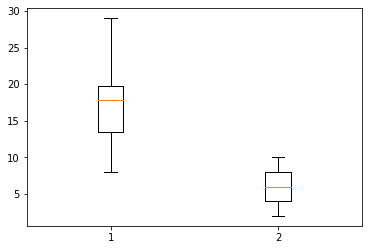

In [60]:
plt.boxplot(df) #the boxplot shows there are no outliers in the data set
plt.show

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

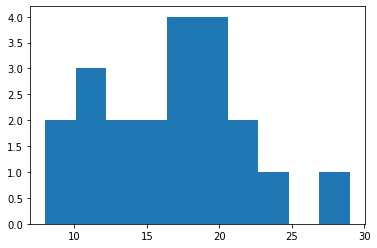

In [61]:
plt.hist(df['Delivery Time']) #so it is not following the bell shaped curve, so it not following normal distribution

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

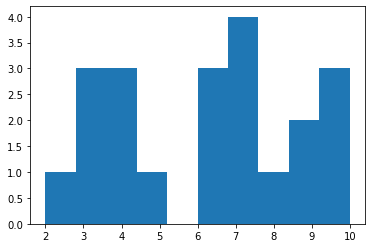

In [62]:
plt.hist(df['Sorting Time']) #it is not following any bell shaped curve so the column is following under normal distribution

In [63]:
print('skewness',df['Delivery Time'].skew()) # skewness is not equal to zero so it is not normally distributed

skewness 0.3523900822831107


In [64]:
print('kurtosis',df['Delivery Time'].kurtosis())

kurtosis 0.31795982942685397


In [65]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

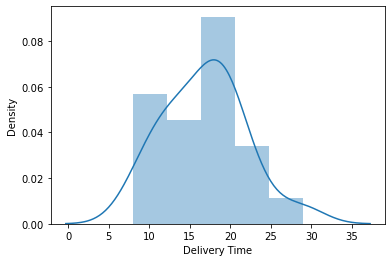

In [66]:
sns.distplot(df['Delivery Time']) #plotting the delivery time

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

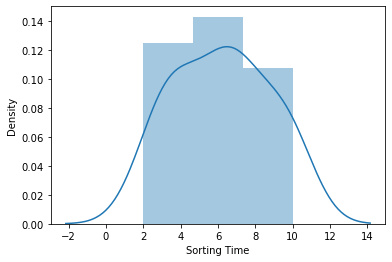

In [67]:
sns.distplot(df['Sorting Time']) #plotting the sorting time 

Text(0, 0.5, 'Sorting Time')

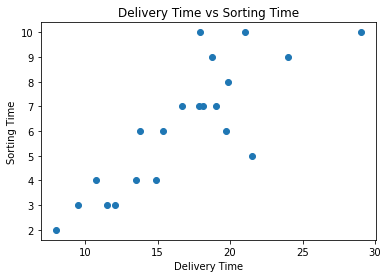

In [68]:
plt.scatter(df['Delivery Time'],df['Sorting Time']) #plotting the scatter plot(delivery time vs sorting time)
plt.title('Delivery Time vs Sorting Time') #so that the data points are collinear
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')


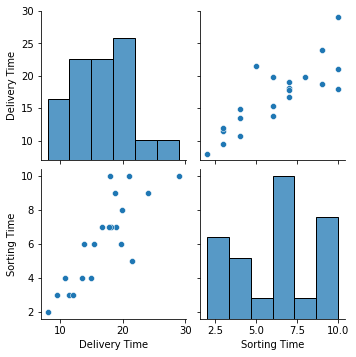

In [69]:
sns.pairplot(df) #scatterplot between the variables and the histogram

In [70]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1) # renaming 
df


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [71]:
import statsmodels.formula.api as smf
model = smf.ols('delivery_time~ sorting_time',data= df).fit() #model transformation
model

In [72]:
model.params 

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [73]:
print('t-values''\n',model.tvalues,'\n','p-values''\n',model.pvalues) #we are finding t and p values
#the p values are less thn 5% or 0.05, so the values are following and consider as good predictions

t-values
 Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 p-values
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [74]:
model.summary()# results of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        16:09:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

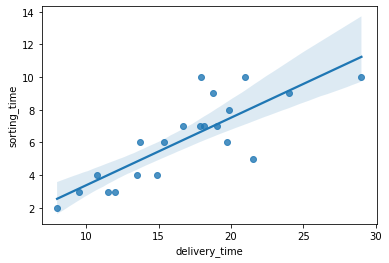

In [75]:
sns.regplot(x='delivery_time',y='sorting_time',data=df) #relation between the two variables

In [78]:
df['SortingTimeSQ']=df['sorting_time']**2 #input variable is squared to design another model
df['SortingTimeSQ']

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: SortingTimeSQ, dtype: int64

In [86]:
model1=smf.ols('delivery_time ~ SortingTimeSQ',data=df).fit()# created the model1 by using square root method

In [87]:
model1.params#delivery_time(y)=mx+c

Intercept        11.237205
SortingTimeSQ     0.124870
dtype: float64

In [88]:
print('t-values''\n',model1.tvalues,'\n','p-values''\n',model1.pvalues)# the t-values and p-values for the model2

t-values
 Intercept        9.398601
SortingTimeSQ    5.691330
dtype: float64 
 p-values
 Intercept        1.415704e-08
SortingTimeSQ    1.739194e-05
dtype: float64


In [89]:
model1.summary() # results of model1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.74e-05
Time:                        16:20:25   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
SortingTimeSQ     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='SortingTimeSQ', ylabel='delivery_time'>

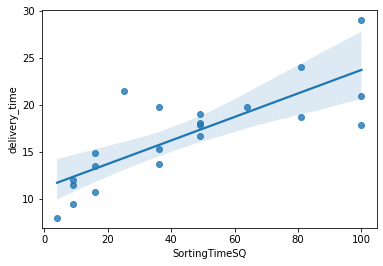

In [90]:
sns.regplot(x='SortingTimeSQ',y='delivery_time',data=df) #So as model1 is better than the model2 beacuse of some promising values of the AIC , lesser the AIC better the model will work.